# 問1

47行（都道府県の数と一致します）で、1行目の男性比率は0.47、世帯年間収入は448万8千円です。

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [9]:
gender = pd.read_excel("data/chapter06_exercise.xlsx")
gender_clust = gender[[
    "男性比率",
    "世帯年間収入"
]]
gender_clust.head()

,男性比率,世帯年間収入
0,0.470857,4488
1,0.469502,4952
2,0.482478,5282
3,0.488725,5702
4,0.469979,5274


In [10]:
len(gender_clust)

47

# 問2

グループ0は、グループ1より、男性比率も平均世帯年間収入も低くなっています。男性比率の高い都道府県のグループのほうが、世帯年間収入も高い傾向があります。

面白いことに、西日本の道府県はグループ0、東日本の都道府県はグループ1の傾向があります。


In [11]:
sc = StandardScaler()
gender_clust_sc = sc.fit_transform(gender_clust)

clusmodel = KMeans(
    n_clusters=2,
    n_init=10,
    random_state=0
)
clusters = clusmodel.fit(gender_clust_sc)
gender_clust["cluster"] = clusters.labels_

gender_clust.head()

,男性比率,世帯年間収入,cluster
0,0.470857,4488,0
1,0.469502,4952,0
2,0.482478,5282,0
3,0.488725,5702,1
4,0.469979,5274,0


In [12]:
gender_clust.groupby("cluster").mean()

,男性比率,世帯年間収入
cluster,,
0,0.474529,4943.909091
1,0.490474,5811.800000


# 問3

散布図をみると、グループ0とグループ1がきれいに分かれています。

正規化したものをデータフレームに入れます。

In [13]:
col = ["男性比率s", "世帯年間収入s"]

df = pd.DataFrame(gender_clust_sc, columns=col)
df.head()

,男性比率s,世帯年間収入s
0,-1.250252,-1.697093
1,-1.389623,-0.838885
2,-0.054770,-0.228522
3,0.587955,0.548304
4,-1.340562,-0.243319


正規化したデータをもとのデータに追加します。

In [14]:
gender_clust2 = pd.concat(
    [gender_clust, df],
    axis=1
)
gender_clust2.head()

,男性比率,世帯年間収入,cluster,男性比率s,世帯年間収入s
0,0.470857,4488,0,-1.250252,-1.697093
1,0.469502,4952,0,-1.389623,-0.838885
2,0.482478,5282,0,-0.054770,-0.228522
3,0.488725,5702,1,0.587955,0.548304
4,0.469979,5274,0,-1.340562,-0.243319


`cluster` （0または1）に分類して、図に描きます。

<Axes: xlabel='男性比率s', ylabel='世帯年間収入s'>

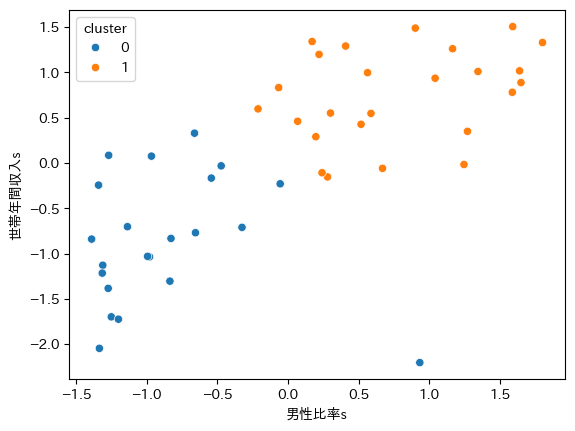

In [15]:
sns.scatterplot(
    x="男性比率s",
    y="世帯年間収入s",
    hue="cluster",
    data=gender_clust2
)

# 問4

グループ0は男性比率、世帯年間収入とも一番低く、グループ1は両方とも一番高いです。グループ2はその中間になります。

関東地方はグループ1、中国地方はグループ2、北海道、九州と四国地方はグループ0の傾向があります。それ以外の地方には明確な傾向はありません。


In [16]:
clusmodel3= KMeans(
    n_clusters=3,
    n_init=10,
    random_state=0
)
clusters = clusmodel3.fit(gender_clust_sc)
gender_clust["cluster3"] = clusters.labels_

gender_clust.head()

,男性比率,世帯年間収入,cluster,cluster3
0,0.470857,4488,0,1
1,0.469502,4952,0,1
2,0.482478,5282,0,0
3,0.488725,5702,1,0
4,0.469979,5274,0,1


In [17]:
gender_clust.groupby("cluster3").mean()

,男性比率,世帯年間収入,cluster
cluster3,,,
0,0.483652,5639.105263,0.736842
1,0.473576,4808.705882,0.000000
2,0.496481,5924.545455,1.000000


In [18]:
gender_clust3 = pd.concat(
    [gender_clust, df],
    axis=1
)
gender_clust3.head()

,男性比率,世帯年間収入,cluster,cluster3,男性比率s,世帯年間収入s
0,0.470857,4488,0,1,-1.250252,-1.697093
1,0.469502,4952,0,1,-1.389623,-0.838885
2,0.482478,5282,0,0,-0.054770,-0.228522
3,0.488725,5702,1,0,0.587955,0.548304
4,0.469979,5274,0,1,-1.340562,-0.243319


<Axes: xlabel='男性比率s', ylabel='世帯年間収入s'>

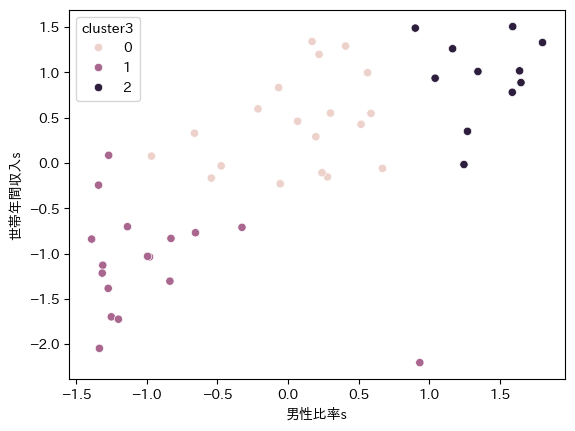

In [19]:
sns.scatterplot(
    x="男性比率s",
    y="世帯年間収入s",
    hue="cluster3",
    data=gender_clust3
)

問3と問4の表を一緒に作成するには次のようにします。

In [20]:
pref = gender["都道府県"]
gender_clust_d = pd.concat(
    [gender_clust3, pref],
    axis=1
)
gender_clust_d.head()

,男性比率,世帯年間収入,cluster,cluster3,男性比率s,世帯年間収入s,都道府県
0,0.470857,4488,0,1,-1.250252,-1.697093,北海道
1,0.469502,4952,0,1,-1.389623,-0.838885,青森県
2,0.482478,5282,0,0,-0.054770,-0.228522,岩手県
3,0.488725,5702,1,0,0.587955,0.548304,宮城県
4,0.469979,5274,0,1,-1.340562,-0.243319,秋田県


In [21]:
gender_clust_d1 = gender_clust_d[[
    "男性比率",
    "世帯年間収入",
    "cluster",
    "都道府県"
]]
gender_clust_d1.head()

,男性比率,世帯年間収入,cluster,都道府県
0,0.470857,4488,0,北海道
1,0.469502,4952,0,青森県
2,0.482478,5282,0,岩手県
3,0.488725,5702,1,宮城県
4,0.469979,5274,0,秋田県


In [22]:
gender_clust_d2 = gender_clust_d[[
    "男性比率",
    "世帯年間収入",
    "cluster3",
    "都道府県"
]]
gender_clust_d2.head()

,男性比率,世帯年間収入,cluster3,都道府県
0,0.470857,4488,1,北海道
1,0.469502,4952,1,青森県
2,0.482478,5282,0,岩手県
3,0.488725,5702,0,宮城県
4,0.469979,5274,1,秋田県




# 問5

グループ0は男性比率、世帯年間収入とも一番低く、グループ3は両方とも一番高いです。グループ1と2はその中間で、グループ1は男性比率、世帯年間収入が2番目に高く、グループ2は両方とも3番目に高くなっています。

$$

グループ0 < グループ2 < グループ1 < グループ3
$$

北海道、九州地方がグループ0、近畿地方がグループ2、中部、中国地方がグループ1、関東地方がグループ3の傾向があります。それ以外の地方は明確な傾向はありません。東北地方は県による違いが大きいようです。


In [24]:
clusmodel4 = KMeans(
    n_clusters=4,
    n_init=10,
    random_state=0
)
clusters = clusmodel4.fit(gender_clust_sc)
gender_clust["cluster4"] = clusters.labels_

gender_clust.head()

,男性比率,世帯年間収入,cluster,cluster3,cluster4
0,0.470857,4488,0,1,0
1,0.469502,4952,0,1,0
2,0.482478,5282,0,0,2
3,0.488725,5702,1,0,1
4,0.469979,5274,0,1,2


In [25]:
gender_clust.groupby("cluster4").mean()

,男性比率,世帯年間収入,cluster,cluster3
cluster4,,,,
0,0.473337,4638.909091,0.0,1.000000
1,0.485754,5723.214286,1.0,0.000000
2,0.475720,5248.909091,0.0,0.545455
3,0.496481,5924.545455,1.0,2.000000


In [26]:
gender_clust4 = pd.concat(
    [gender_clust, df],
    axis=1
)
gender_clust4.head()

,男性比率,世帯年間収入,cluster,cluster3,cluster4,男性比率s,世帯年間収入s
0,0.470857,4488,0,1,0,-1.250252,-1.697093
1,0.469502,4952,0,1,0,-1.389623,-0.838885
2,0.482478,5282,0,0,2,-0.054770,-0.228522
3,0.488725,5702,1,0,1,0.587955,0.548304
4,0.469979,5274,0,1,2,-1.340562,-0.243319


<Axes: xlabel='男性比率s', ylabel='世帯年間収入s'>

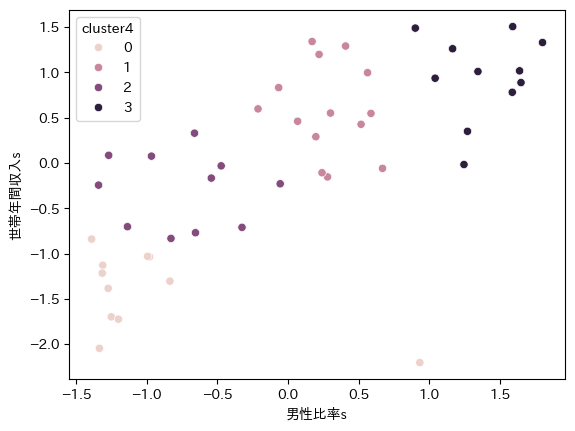

In [27]:
sns.scatterplot(
    x="男性比率s",
    y="世帯年間収入s",
    hue="cluster4",
    data=gender_clust4
)

In [28]:
pref = gender["都道府県"]
gender_clust_e = pd.concat(
    [gender_clust4, pref],
    axis=1
)
gender_clust_e.head()

,男性比率,世帯年間収入,cluster,cluster3,cluster4,男性比率s,世帯年間収入s,都道府県
0,0.470857,4488,0,1,0,-1.250252,-1.697093,北海道
1,0.469502,4952,0,1,0,-1.389623,-0.838885,青森県
2,0.482478,5282,0,0,2,-0.054770,-0.228522,岩手県
3,0.488725,5702,1,0,1,0.587955,0.548304,宮城県
4,0.469979,5274,0,1,2,-1.340562,-0.243319,秋田県


In [29]:
gender_clust_e2 = gender_clust_e[["男性比率", "世帯年間収入", "cluster4", "都道府県"]]
gender_clust_e2.head()

,男性比率,世帯年間収入,cluster4,都道府県
0,0.470857,4488,0,北海道
1,0.469502,4952,0,青森県
2,0.482478,5282,2,岩手県
3,0.488725,5702,1,宮城県
4,0.469979,5274,2,秋田県


たまにある質問：

> 男性比率だけでなく、女性比率をいれて分析しなくてもよいのですか？

両者は同じ情報（＝相関係数は$-1$となり、完全な負の相関があります）なので、どちらか好きなほう1つで十分です。

$1-男性比率=女性比率$ より、男性比率が高くなる＝女性比率が低くなる、と読み替えればよいからです。
